In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import os

In [3]:
#Load Data
datasource="../data/benin-malanville.csv"
df = pd.read_csv(datasource);

In [9]:
#summary of the data (Data description)
#df.info()
print("summary of the data (Data description)")   
print(df.describe())

summary of the data (Data description)
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.0000

In [10]:
#check for missing values
print("check for missing values")
print(df.isnull().sum())
#checking for valuese missed more than 5% of the data
missing_values = df.isnull().sum() / len(df) * 100
print(missing_values[missing_values > 5])


check for missing values
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Comments    100.0
dtype: float64


In [12]:
# Outlier Detection using Z-scores
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = np.abs(stats.zscore(df[key_cols].dropna()))
outliers = (z_scores > 3).any(axis=1)
print(f"\nOutlier Rows Detected: {outliers.sum()}")


Outlier Rows Detected: 7740


In [13]:
#Clean: Impute Missing with Median
df[key_cols] = df[key_cols].apply(lambda col: col.fillna(col.median()))

In [14]:
#Save Cleaned Data (CSV)
clean_path = "data/benin_clean.csv"
os.makedirs("data", exist_ok=True)
df.to_csv(clean_path, index=False)

<Figure size 1500x600 with 0 Axes>

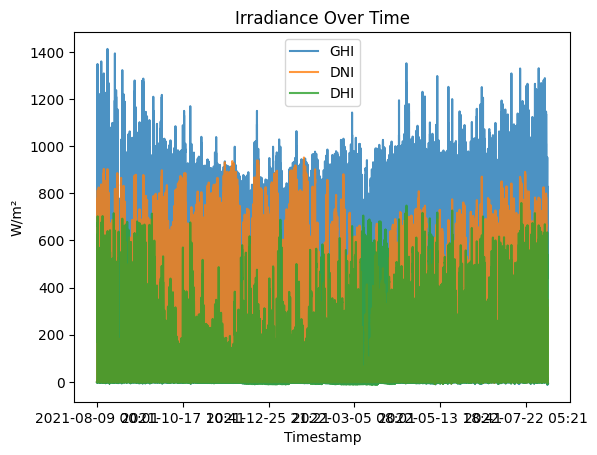

In [15]:
#Time Series Analysis
plt.figure(figsize=(15, 6))
df.set_index('Timestamp')[['GHI', 'DNI', 'DHI']].plot(title="Irradiance Over Time", alpha=0.8)
plt.ylabel("W/m²")
plt.show()


<Figure size 1500x600 with 0 Axes>

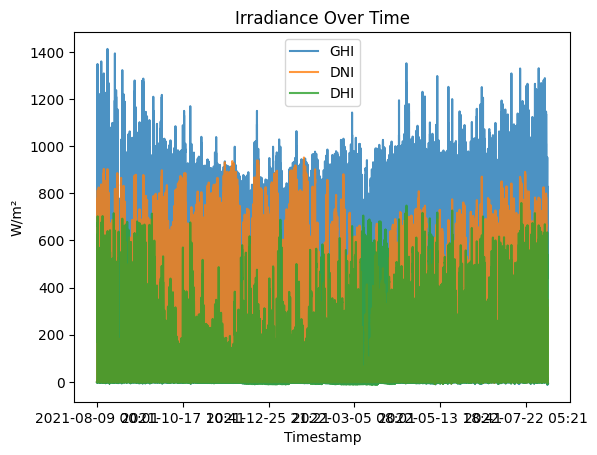

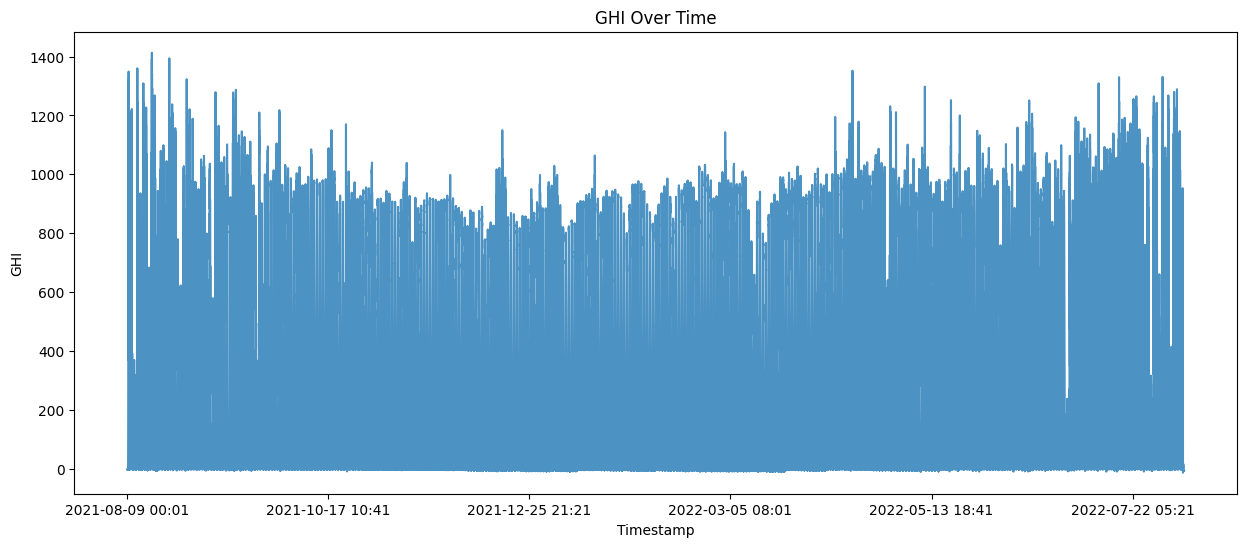

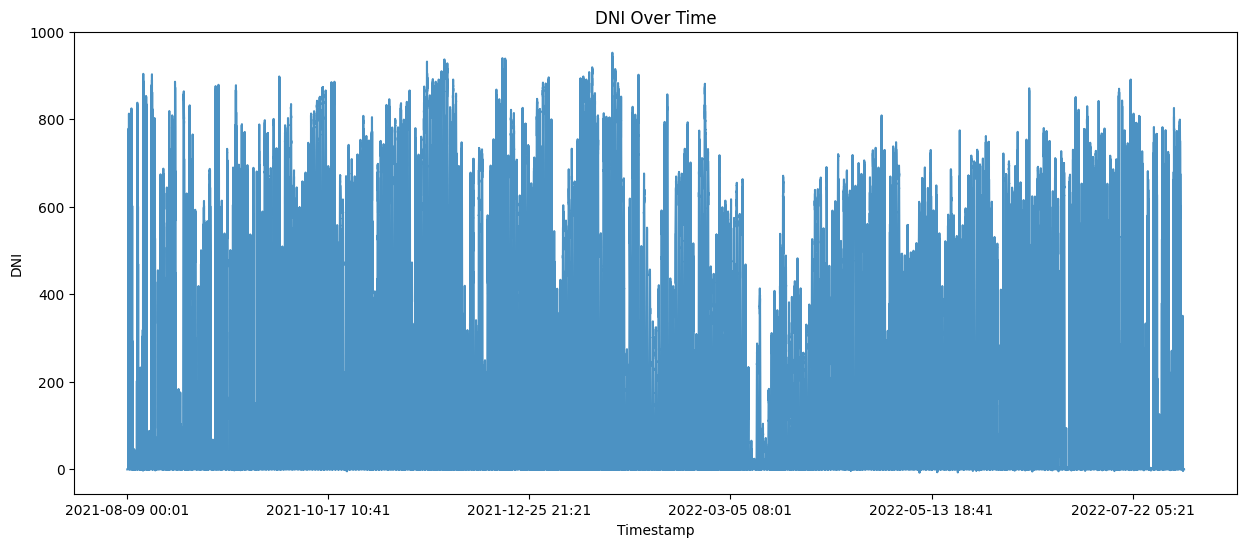

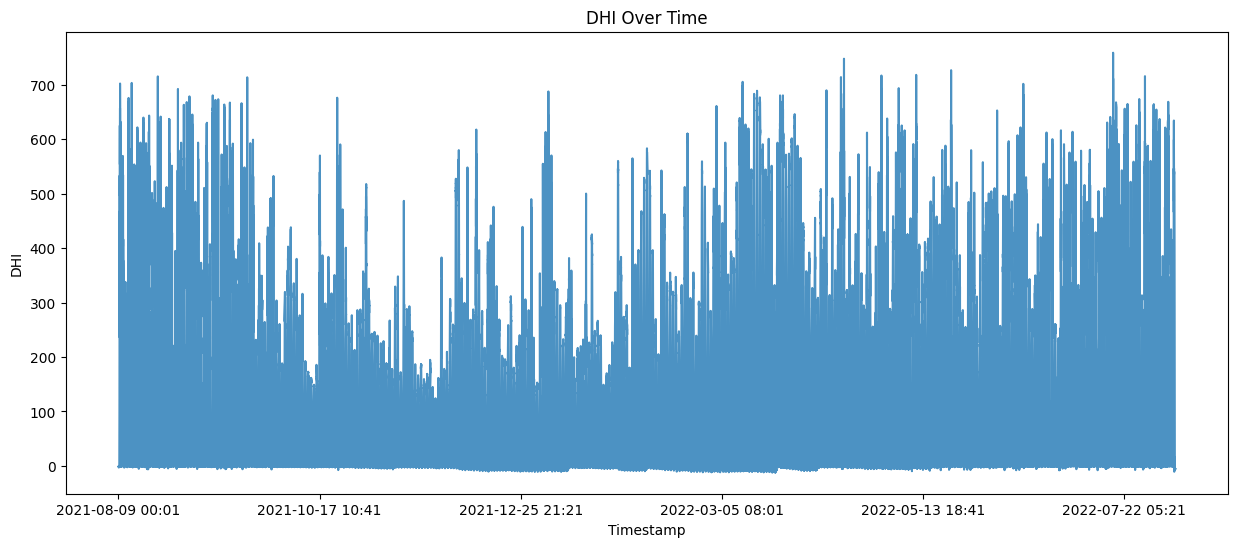

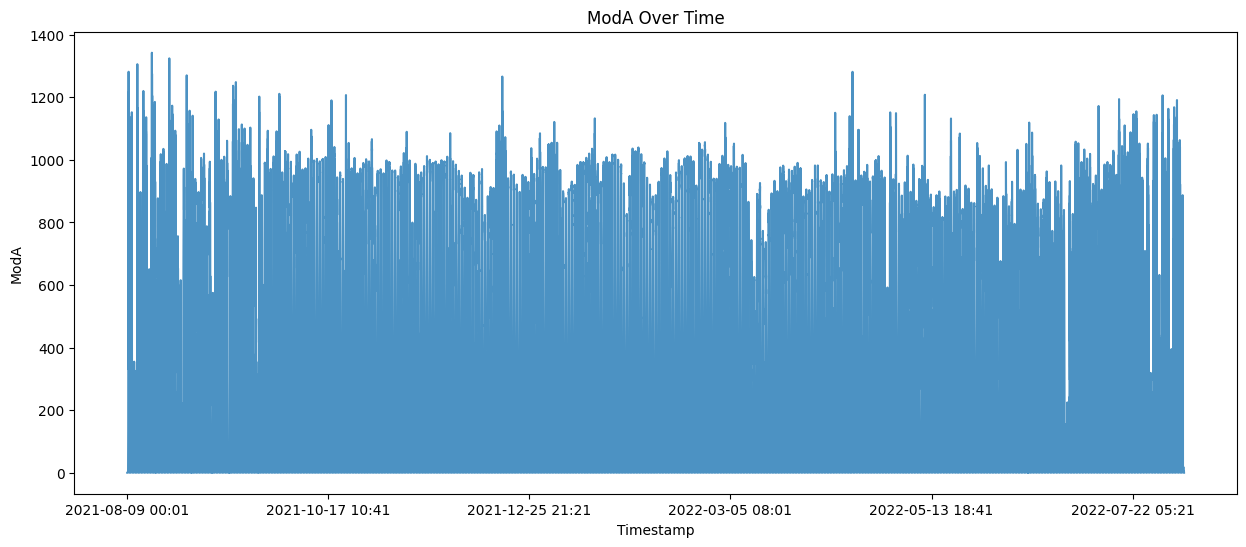

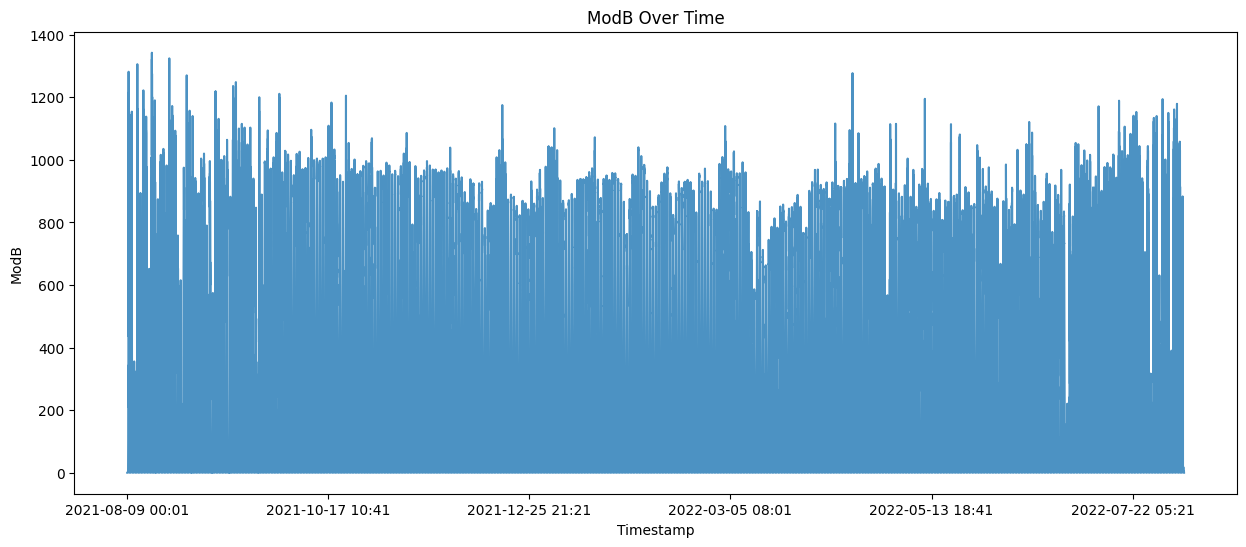

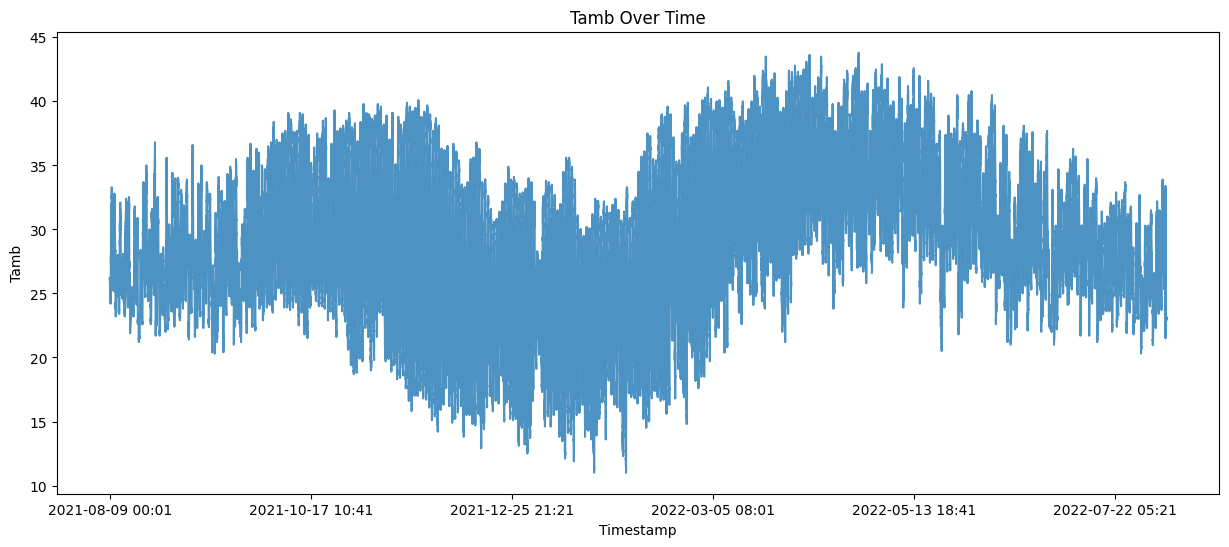

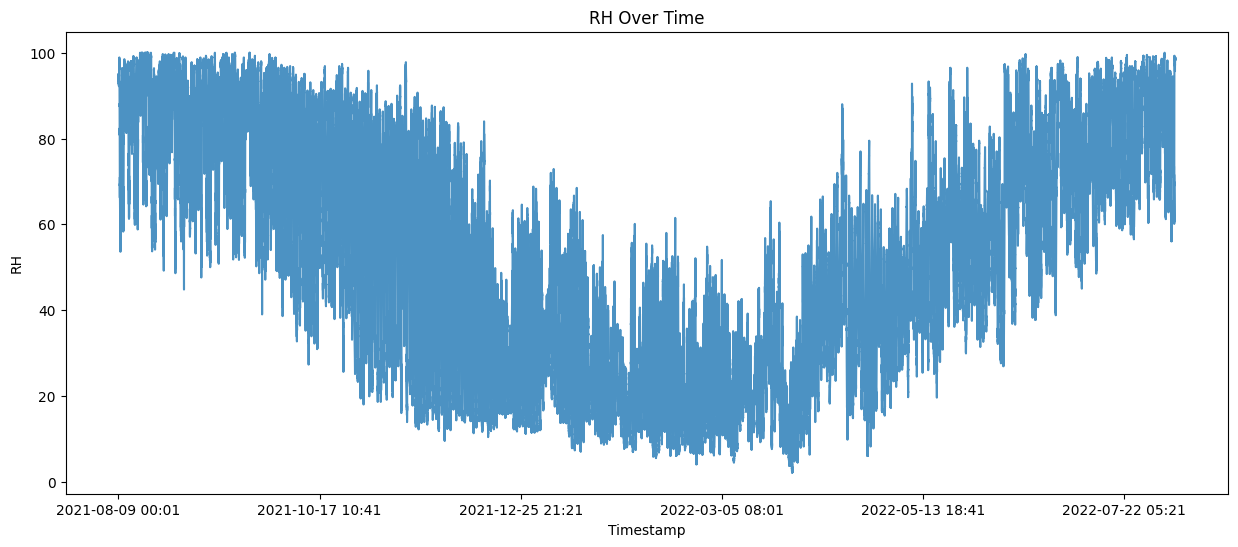

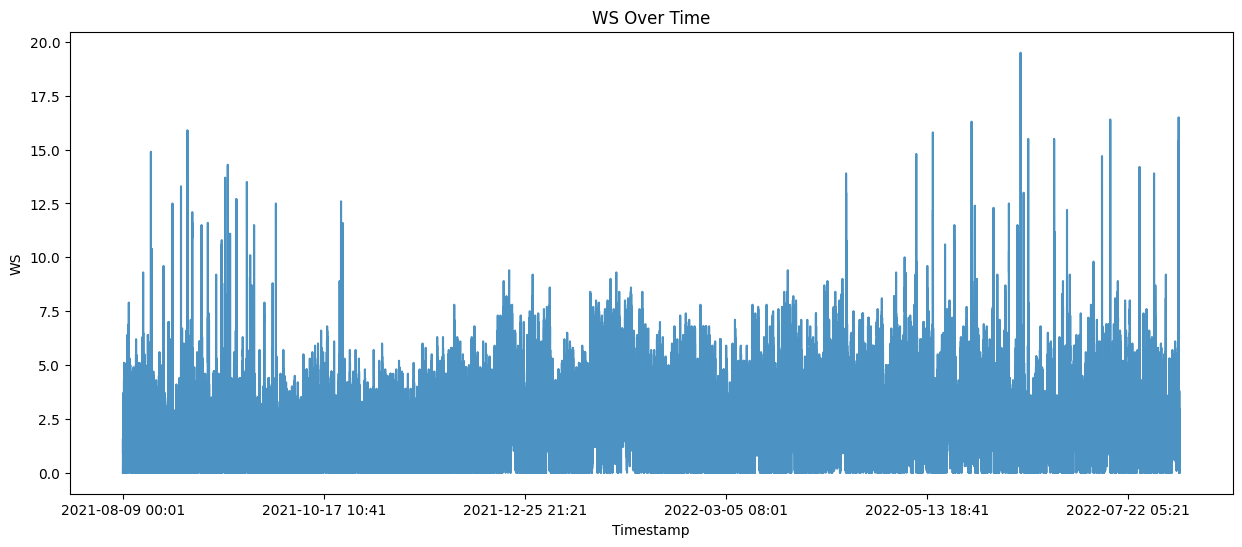

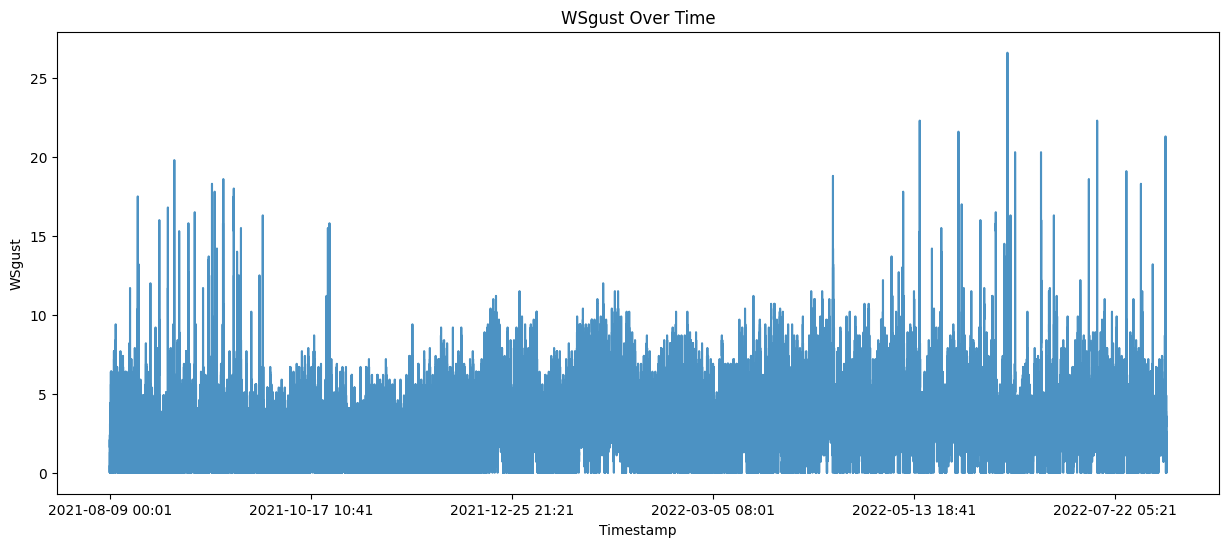

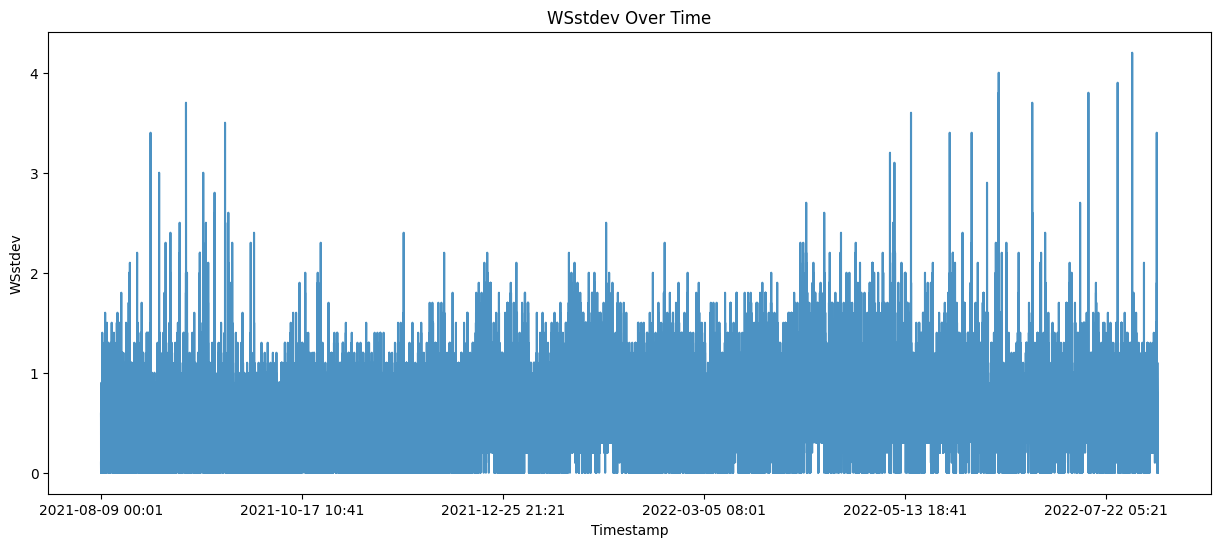

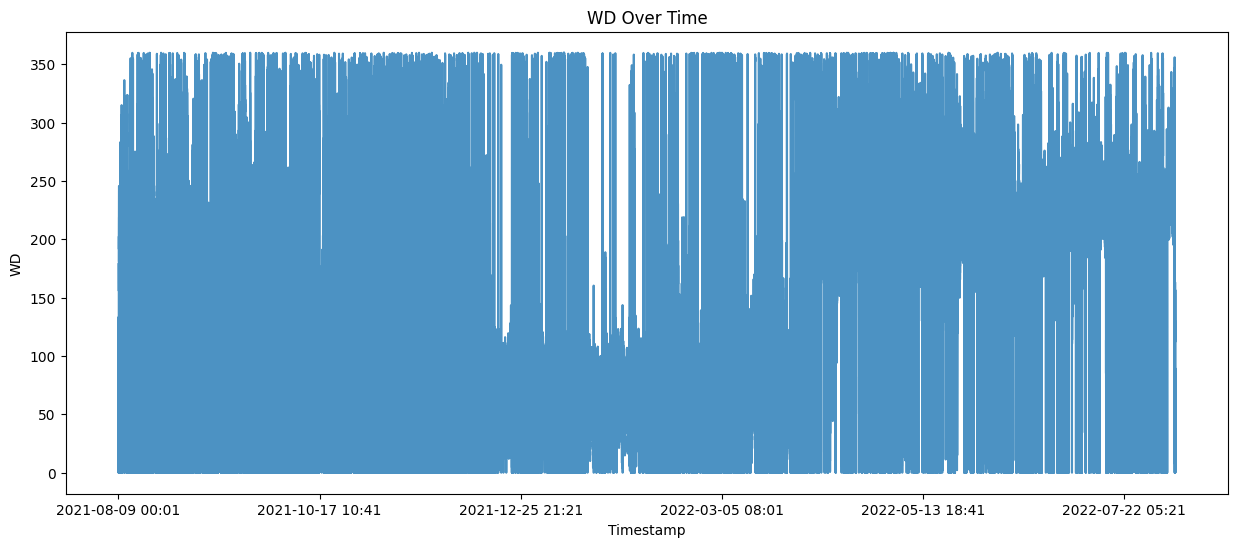

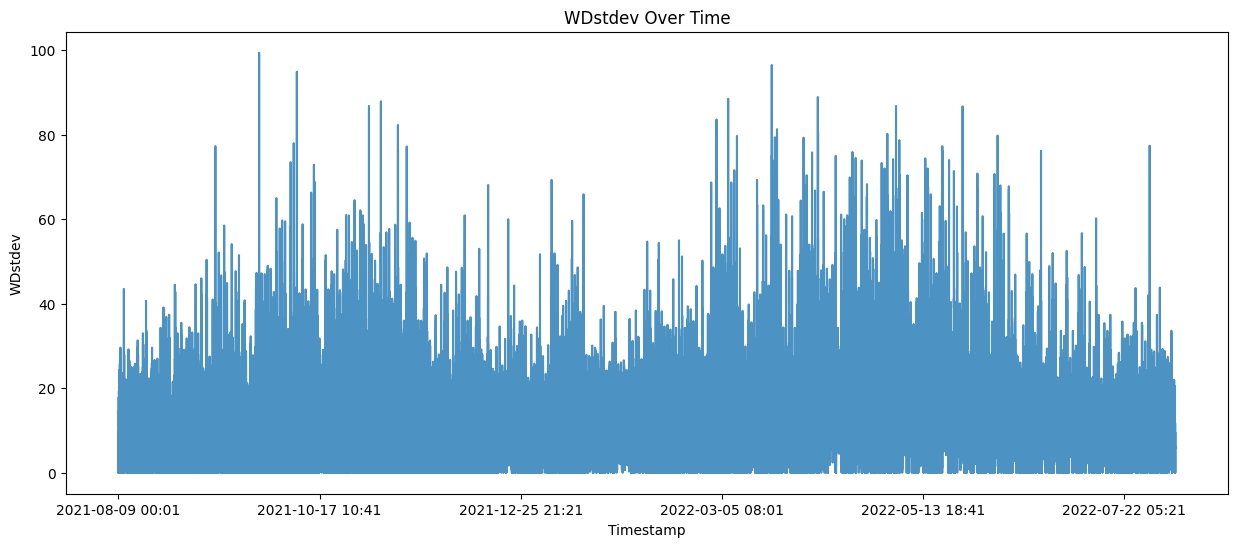

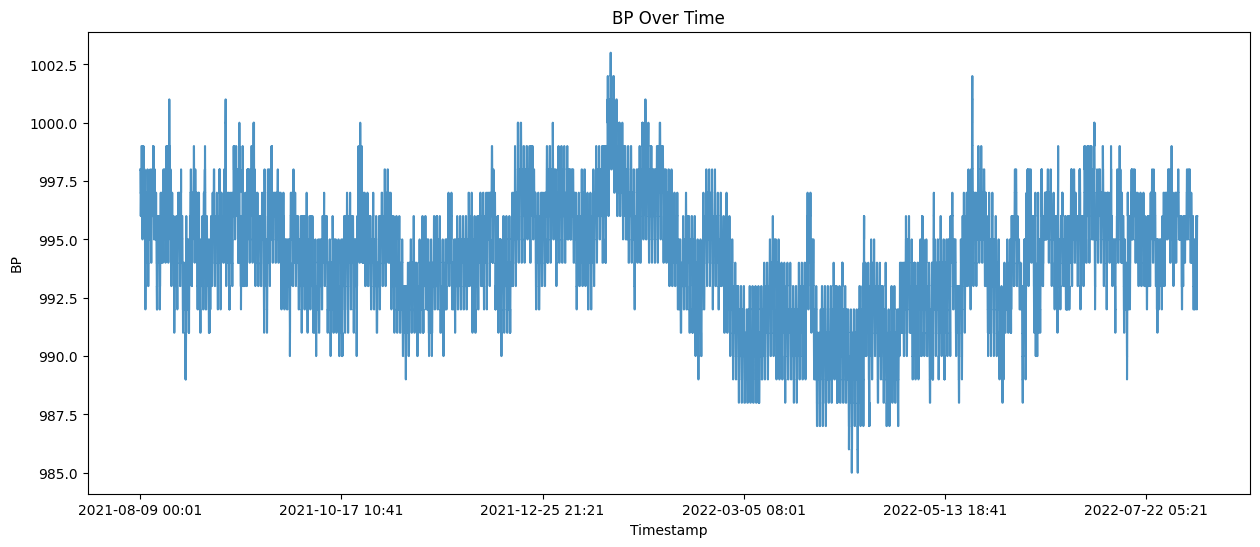

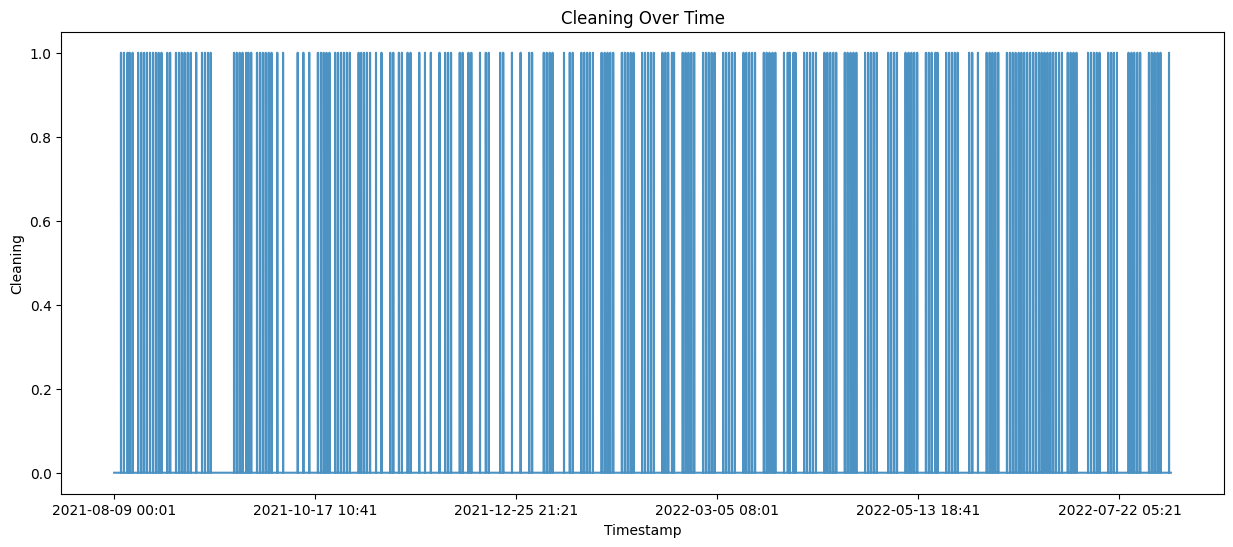

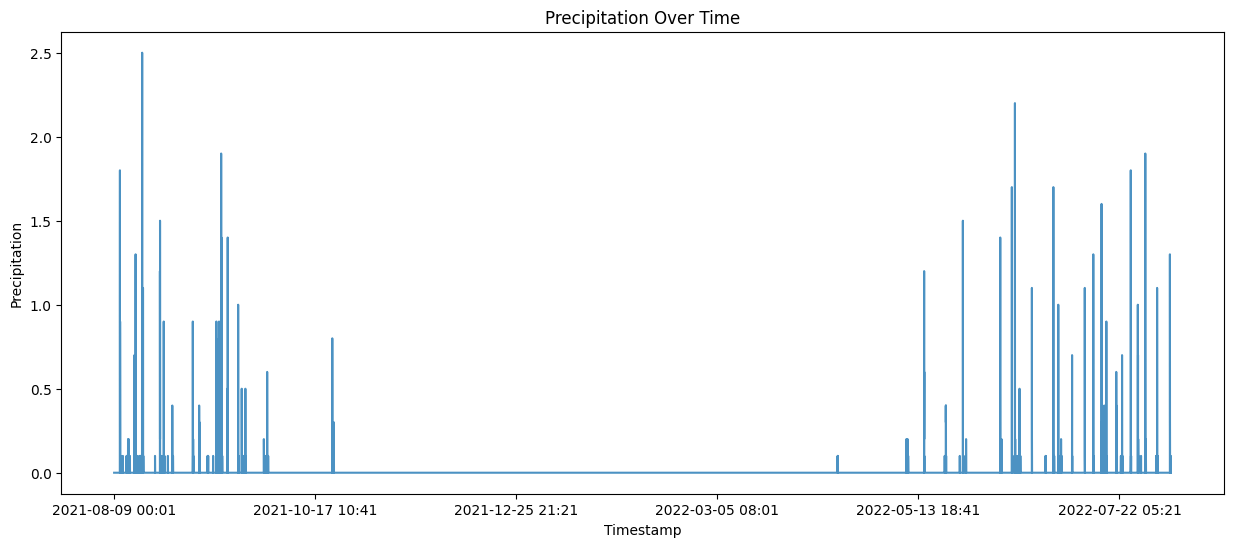

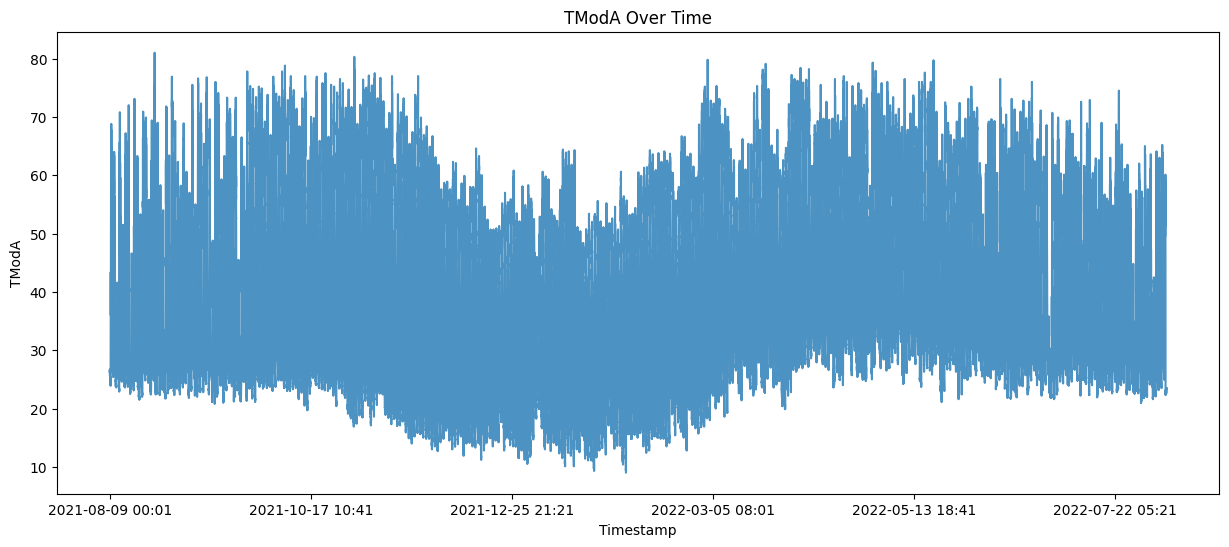

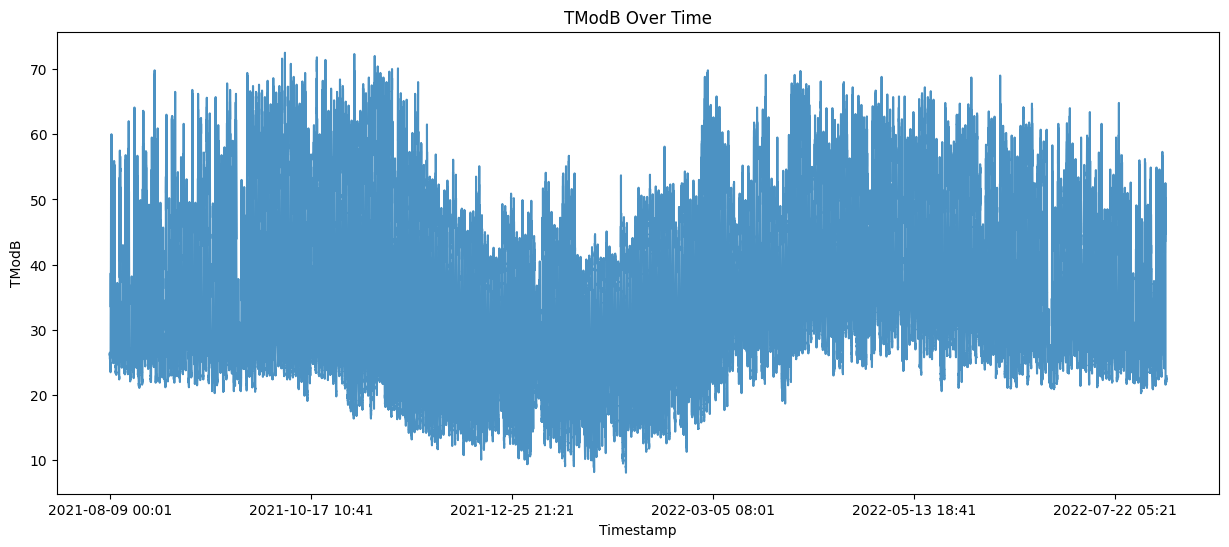

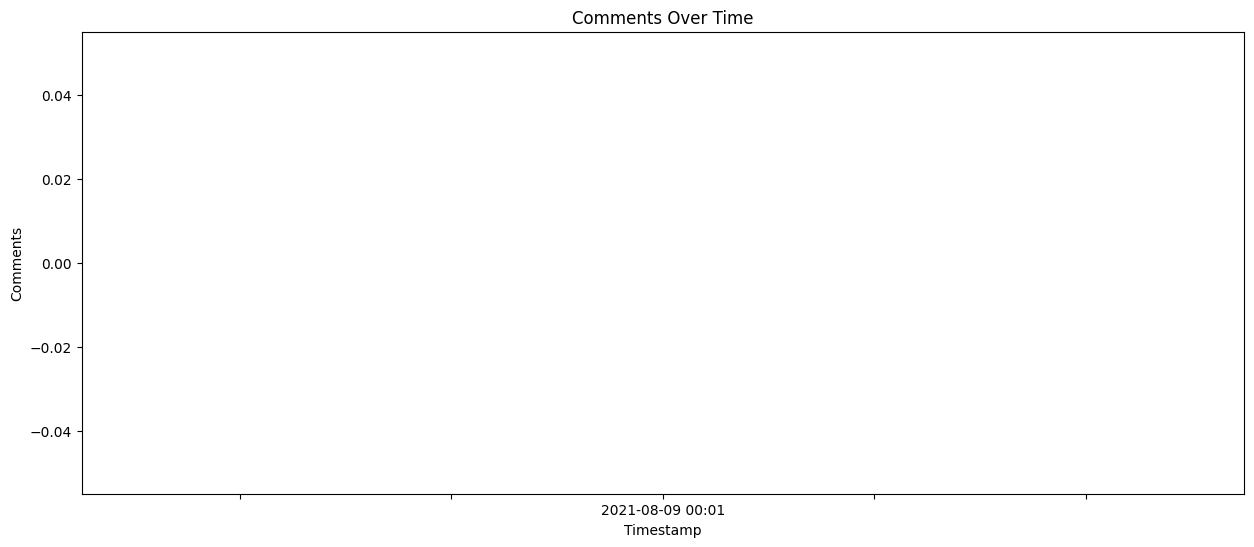

In [ ]:
# Set timestamp as index
df_ts = df.set_index('Timestamp')
#plot GHI DHI  DNI  column
plt.figure(figsize=(15, 6)) 
df_ts[['GHI', 'DNI', 'DHI']].plot(title="Irradiance Over Time", alpha=0.8)
plt.ylabel("W/m²")  
col = ['GHI', 'DNI', 'DHI']
for col in col:
    plt.figure(figsize=(15, 6))
    df_ts[col].plot(title=f"{col} Over Time", alpha=0.8)
    plt.ylabel(col)
    plt.show()


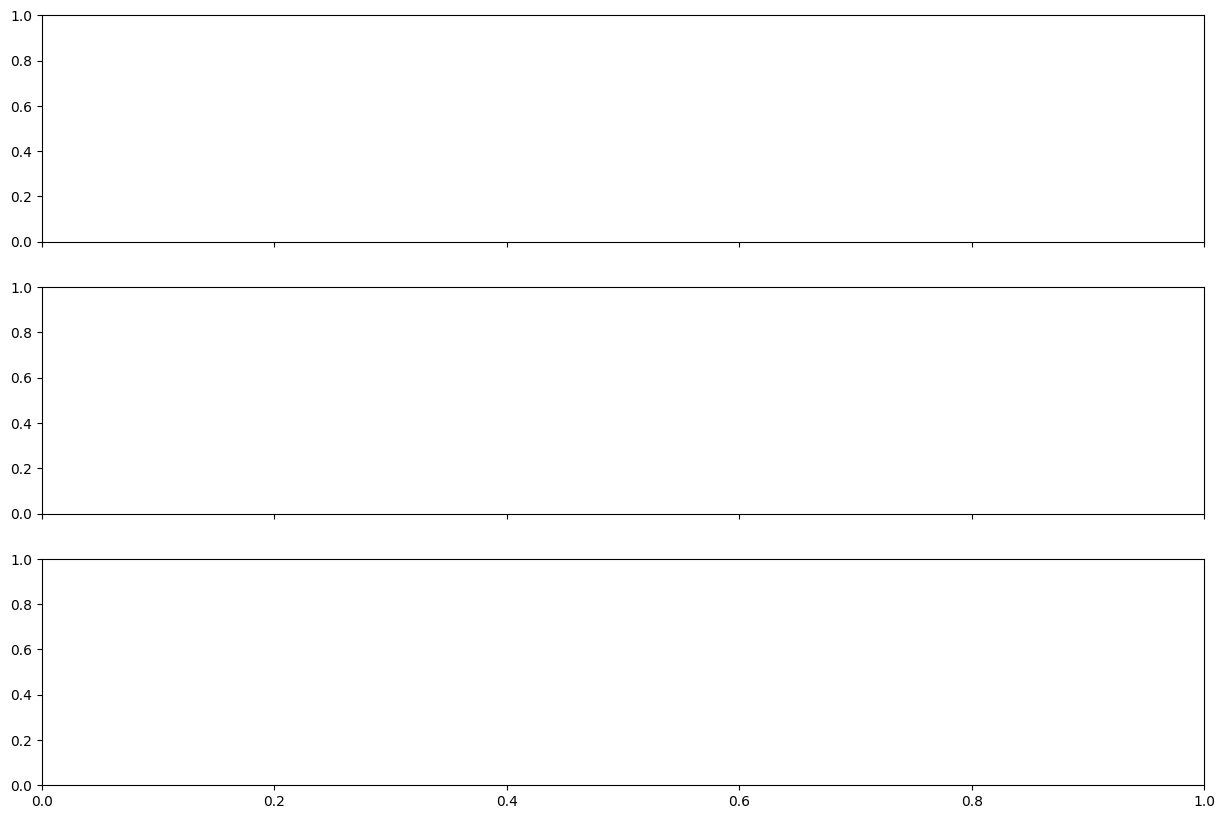

In [20]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 10), sharex=True)